## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247 Winter Quarter 2022, Prof. J.C. Kao, TAs Y. Li, P. Lu, T. Monsoor, T. wang

In [133]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

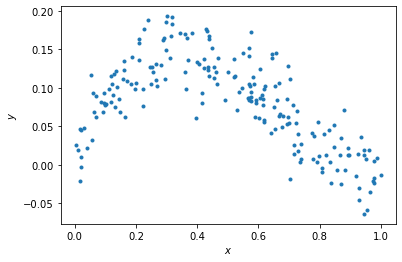

In [134]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) Uniform Distribution between 0 and 1

(2) Normal Distribution with mean 0 and standard deviation 0.03

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [135]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y)) # please modify this line

# ================== #
# END YOUR CODE HERE #
# ================== #

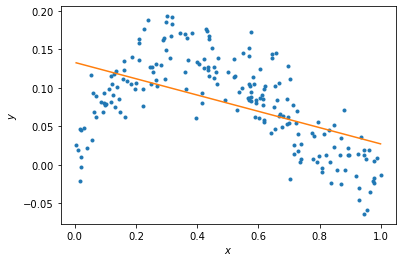

In [136]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model underfits the data

(2) The model is very simple to capture the relationship between input and output, we need to increase complexity of model by adding higher order polynomial terms

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [137]:
N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #


xhats = [np.vstack((x, np.ones_like(x))), np.vstack((x*x, x, np.ones_like(x))),
         np.vstack((x*x*x, x*x, x, np.ones_like(x))), np.vstack((x*x*x*x, x*x*x, x*x, x, np.ones_like(x))),
         np.vstack((x*x*x*x*x, x*x*x*x, x*x*x, x*x, x, np.ones_like(x)))]
thetas = [np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y)) for xhat in xhats]
# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

pass

# ================== #
# END YOUR CODE HERE #
# ================== #

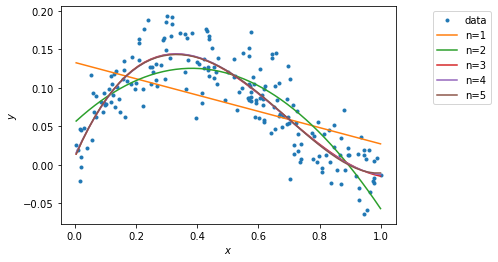

In [138]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5:

$L(\theta) = \frac{1}{2}\sum_{j}(\hat{y}_j - y_j)^2$

In [139]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

training_errors = [0.5* np.sum(np.square(y-(thetas[i]@xhats[i]))) for i in range(N)]

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.2379961088362701, 0.10924922209268531, 0.08169603801105371, 0.08165353735296985, 0.08161479195525291]


### QUESTIONS

(1) Which polynomial model has the best training error?

(2) Why is this expected?

### ANSWERS

(1) Polynomial model of degree 5

(2) Becuase it has more complexity and hance more degrees of freedom to fit the training data.

### Generating new samples and validation error (5 points)

Here, we'll now generate new samples and calculate the validation error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

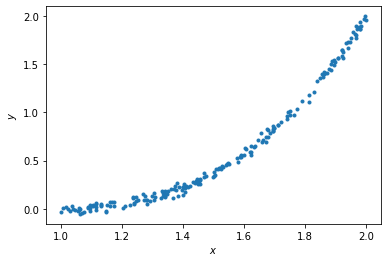

In [140]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [141]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

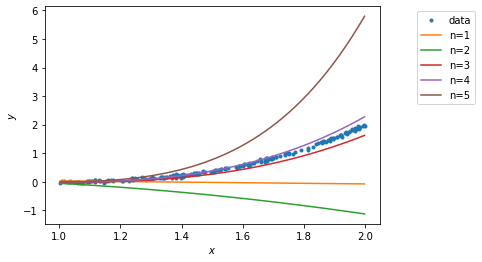

In [142]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [143]:
validation_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

validation_errors = [0.5* np.sum(np.square(y-(thetas[i]@xhats[i]))) for i in range(N)]
# GOAL: create a variable validation_errors, a list of 5 elements,
# where validation_errors[i] are the validation loss for the polynomial fit of order i+1.
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Validation errors are: \n', validation_errors)

Validation errors are: 
 [80.86165184550586, 213.19192445057962, 3.1256971082784704, 1.1870765198488837, 214.91021806189653]


### QUESTIONS

(1) Which polynomial model has the best validation error?

(2) Why does the order-5 polynomial model not generalize well?

### ANSWERS

(1) Polynomial model of degree 4

(2) It overfits the training data by capturing the noise in it and hence is not able to generalize well